In [ ]:
#1. Load and prepare a dataset for binary classification
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(r"C:/Databases/breast-cancer.csv")
data.drop('id', axis=1, inplace=True)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
#2.Train an SVM with linear and RBF kernel
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)


SVC()

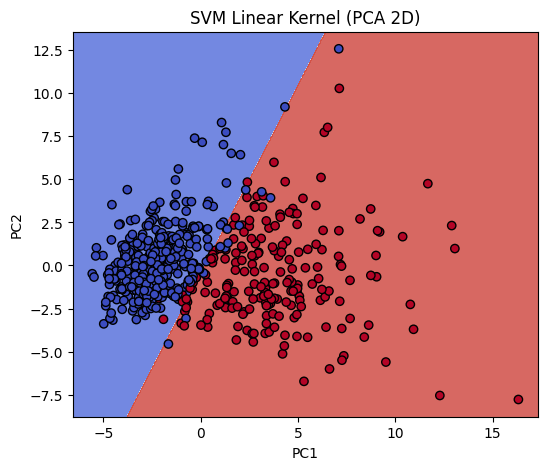

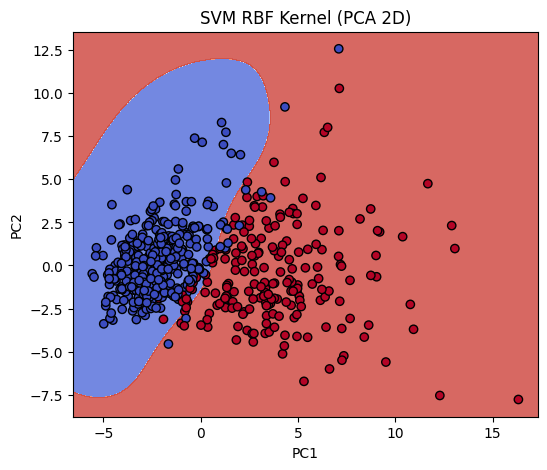

In [ ]:
#3.Visualize decision boundary using 2D data
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)
svm_linear_2d = SVC(kernel='linear').fit(X_train_pca, y_train_pca)
svm_rbf_2d = SVC(kernel='rbf').fit(X_train_pca, y_train_pca)

def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_linear_2d, X_pca, y, "SVM Linear Kernel (PCA 2D)")
plot_decision_boundary(svm_rbf_2d, X_pca, y, "SVM RBF Kernel (PCA 2D)")


In [ ]:
#4. Tune hyperparameters like C and gamma
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0, cv=5)
grid.fit(X_train, y_train)
print("Best Hyperparameters:")
print(grid.best_params_)


Best Hyperparameters:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
#5.Use cross-validation to evaluate performance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

best_model = grid.best_estimator_
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy: %.4f" % cv_scores.mean())

y_pred = best_model.predict(X_test)
print("Test Accuracy: %.4f" % accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Cross-validation scores: [0.97368421 0.97368421 0.98245614 0.97368421 0.99115044]
Mean CV Accuracy: 0.9789
Test Accuracy: 0.9883

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171

